<a href="https://colab.research.google.com/github/Satyake/TF-ZTM/blob/main/NN_Regression%2BClassification_Extra_curricular_ZTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np


In [ ]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.boston_housing.load_data(test_split=0.2, seed=113)

57026/57026 [==============================] - 0s 0us/step


In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [ ]:
 y_train[:10]

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4])

In [ ]:
def NNRegressor():
  model=tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(10, activation='relu',input_shape=[13]))
  model.add(tf.keras.layers.Dense(10,activation='relu'))
  model.add(tf.keras.layers.Dense(2, activation='relu'))
  model.add(tf.keras.layers.Dense(1))
  return model

In [ ]:
model=NNRegressor()
model.compile(loss=tf.keras.losses.mean_squared_error,metrics=['mse'],optimizer='adam')

In [ ]:
history_regressor=model.fit(x_train,y_train, epochs=300, validation_split=0.25)

Epoch 1/300
10/10 [==============================] - 3s 54ms/step - loss: 9464.8984 - mse: 9464.8984 - val_loss: 7729.5703 - val_mse: 7729.5703
Epoch 2/300
10/10 [==============================] - 0s 10ms/step - loss: 5837.6460 - mse: 5837.6460 - val_loss: 4743.9824 - val_mse: 4743.9824
Epoch 3/300
10/10 [==============================] - 0s 14ms/step - loss: 3494.1882 - mse: 3494.1882 - val_loss: 2914.3516 - val_mse: 2914.3516
Epoch 4/300
10/10 [==============================] - 0s 17ms/step - loss: 2107.6367 - mse: 2107.6367 - val_loss: 1809.7703 - val_mse: 1809.7703
Epoch 5/300
10/10 [==============================] - 0s 11ms/step - loss: 1270.0243 - mse: 1270.0243 - val_loss: 1220.4355 - val_mse: 1220.4355
Epoch 6/300
10/10 [==============================] - 0s 17ms/step - loss: 940.7556 - mse: 940.7556 - val_loss: 1002.7469 - val_mse: 1002.7469
Epoch 7/300
10/10 [==============================] - 0s 14ms/step - loss: 775.0255 - mse: 775.0255 - val_loss: 848.3774 - val_mse: 848.377

In [ ]:
predictions=model.predict(x_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(predictions, y_test)

4/4 [==============================] - 0s 3ms/step


502.67611472898375

In [ ]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

x,y=make_moons(n_samples=1000, shuffle=False,random_state=43)
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((700, 2), (300, 2), (700,), (300,))

In [ ]:
def classifier():
  model=tf.keras.Sequential([
      tf.keras.layers.Dense(10, activation='relu', input_shape=[2]),
      tf.keras.layers.Dense(20, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ]
  )
  return model

In [ ]:
model_classifier=classifier()

In [ ]:
model_classifier.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'],loss='binary_crossentropy')

In [ ]:
history_classifier=model_classifier.fit(x_train,y_train,validation_split=0.25, epochs=100, verbose=0)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(tf.round(model_classifier.predict(x_test)), y_test)
confusion_matrix(tf.round(model_classifier.predict(x_test)),y_test)

10/10 [==============================] - 0s 2ms/step


array([[154,   4],
       [  4, 138]])

In [ ]:
#FMNIST
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
labels=['T-shirt/top','Trouser','Pullover', 'Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [ ]:
import random
import os
import matplotlib.pyplot as plt
def random_visualization(labels):
  for i in range(0,5):
    index=random.randint(0,len(x_train))
    plt.figure(figsize=(5,2))
    plt.imshow(x_train[index])
    plt.title(labels[y_train[index]])
    plt.show()


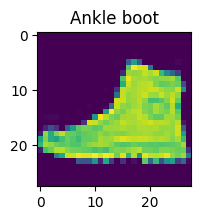

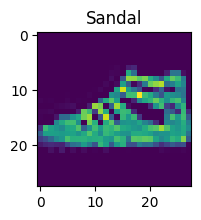

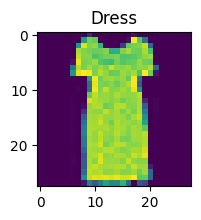

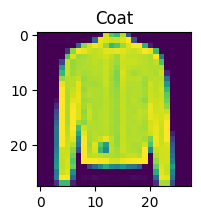

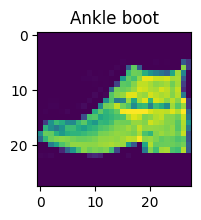

In [ ]:
random_visualization(labels)

In [ ]:
from numpy import exp
def softmax(vector):
  output=exp(vector)
  return output/output.sum()

In [ ]:
vector=[1,5,6]
softmax(vector)

array([0.00490169, 0.26762315, 0.72747516])

In [ ]:
def classifier(input_shape):
  input=tf.keras.layers.Input(input_shape)
  x=tf.keras.layers.Flatten()(input)
  x=tf.keras.layers.Dense(100,activation='tanh')(x)
  final_layer=tf.keras.layers.Dense(10,activation='softmax')(x)
  model=tf.keras.Model(inputs=input, outputs=final_layer)
  return model

In [ ]:
input_shape=(28,28)
model_classifier=classifier(input_shape)

In [ ]:
model_classifier.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 100)               78500     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_classifier.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
history_classifier_FMNIST=model_classifier.fit(x_train,y_train,validation_split=0.25, epochs=100,verbose=1)

Epoch 1/100
1407/1407 [==============================] - 7s 5ms/step - loss: 1.0522 - accuracy: 0.6290 - val_loss: 0.8733 - val_accuracy: 0.6982
Epoch 2/100
1407/1407 [==============================] - 8s 6ms/step - loss: 0.9291 - accuracy: 0.6486 - val_loss: 0.8889 - val_accuracy: 0.6653
Epoch 3/100
1407/1407 [==============================] - 6s 4ms/step - loss: 0.8822 - accuracy: 0.6744 - val_loss: 0.8806 - val_accuracy: 0.6530
Epoch 4/100
1407/1407 [==============================] - 9s 6ms/step - loss: 0.8776 - accuracy: 0.6677 - val_loss: 0.7937 - val_accuracy: 0.6995
Epoch 5/100
1407/1407 [==============================] - 6s 4ms/step - loss: 0.8387 - accuracy: 0.6745 - val_loss: 0.8017 - val_accuracy: 0.7091
Epoch 6/100
1407/1407 [==============================] - 7s 5ms/step - loss: 0.8120 - accuracy: 0.6948 - val_loss: 0.7982 - val_accuracy: 0.6814
Epoch 7/100
1407/1407 [==============================] - 7s 5ms/step - loss: 0.7971 - accuracy: 0.6965 - val_loss: 0.7770 - val_ac

In [ ]:
pred=model_classifier.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [ ]:
pred

array([[1.4184537e-06, 2.1447832e-08, 7.0047321e-07, ..., 4.4372659e-02,
        5.2554315e-05, 8.6188132e-01],
       [5.6482865e-03, 4.5123314e-03, 7.5242865e-01, ..., 3.8544184e-07,
        2.4728316e-03, 9.7480342e-06],
       [3.2878001e-05, 9.9714160e-01, 1.5409985e-04, ..., 2.6765351e-06,
        1.5477721e-04, 1.8204188e-05],
       ...,
       [2.6608710e-03, 7.0095382e-07, 4.8505726e-06, ..., 4.5840705e-05,
        9.8878914e-01, 6.4400510e-06],
       [1.3109918e-04, 9.9193382e-01, 1.0129188e-04, ..., 8.3379682e-06,
        1.3524524e-04, 7.0578179e-05],
       [2.1118352e-05, 1.1481120e-06, 1.5177051e-04, ..., 8.8180274e-02,
        2.7346883e-03, 2.6565713e-01]], dtype=float32)

In [ ]:
confusion_matrix(tf.argmax(pred,axis=1),y_test)

array([[769,  14,   9,  36,   0,   1, 189,   0,   2,   0],
       [  2, 913,   1,  10,   1,   0,   2,   0,   1,   0],
       [ 22,  17, 652,  20, 120,   0, 151,   0,   9,   0],
       [ 84,  42,  10, 855,  49,   1,  59,   0,   3,   1],
       [ 12,   8, 198,  32, 691,   0, 202,   0,   2,   0],
       [  0,   0,   0,   0,   0, 896,   0,  45,   6,  30],
       [ 92,   4, 117,  40, 125,   0, 362,   0,  26,   0],
       [  0,   0,   0,   0,   0,  48,   0, 864,   4,  39],
       [ 18,   2,  13,   7,  14,   5,  35,   0, 947,   1],
       [  1,   0,   0,   0,   0,  49,   0,  91,   0, 929]])

In [ ]:
accuracy_score(tf.argmax(pred,axis=1),y_test)

0.7878

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
preds=model_classifier.predict(x_test)

313/313 [==============================] - 2s 5ms/step


In [ ]:
labels[9]

'Ankle boot'

In [ ]:
tf.argmax(preds,axis=1)

TypeError: ignored

In [ ]:
import random
def plotter(labels,x_test,model):
  for i in range(1,4):
     indx=random.randrange(0,100,3)
     pred=tf.argmax(model.predict(x_test)[indx])
     plt.subplot(3,3,i+1)
     plt.imshow(x_train[indx])
     plt.title(f'Predictions: {labels[pred]}')


313/313 [==============================] - 1s 3ms/step


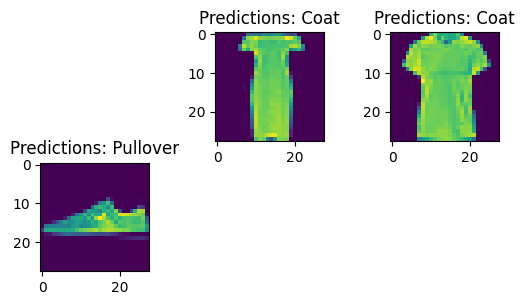

In [ ]:
plotter(labels,x_test,model_classifier)